In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import make_classification
%matplotlib inline

In [107]:
df = pd.read_csv('Air_Traffic_Passenger_Statistics.csv')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              15007 non-null  int64 
 1   Operating Airline            15007 non-null  object
 2   Operating Airline IATA Code  14953 non-null  object
 3   Published Airline            15007 non-null  object
 4   Published Airline IATA Code  14953 non-null  object
 5   GEO Summary                  15007 non-null  object
 6   GEO Region                   15007 non-null  object
 7   Activity Type Code           15007 non-null  object
 8   Price Category Code          15007 non-null  object
 9   Terminal                     15007 non-null  object
 10  Boarding Area                15007 non-null  object
 11  Passenger Count              15007 non-null  int64 
 12  Adjusted Activity Type Code  15007 non-null  object
 13  Adjusted Passenger Count     15

In [109]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [110]:
df.tail()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March
15006,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,10898,Enplaned,10898,2016,March


In [111]:
df.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count', 'Adjusted Activity Type Code',
       'Adjusted Passenger Count', 'Year', 'Month'],
      dtype='object')

In [112]:
df.shape

(15007, 16)

In [113]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
Y = df.iloc[:, -1].values
X = df.iloc[:, :-1].values
print(Y,X)

['July' 'July' 'July' ... 'March' 'March' 'March'] [[200507 'ATA Airlines' 'TZ' ... 'Deplaned' 27271 2005]
 [200507 'ATA Airlines' 'TZ' ... 'Enplaned' 29131 2005]
 [200507 'ATA Airlines' 'TZ' ... 'Thru / Transit * 2' 10830 2005]
 ...
 [201603 'Virgin America' 'VX' ... 'Enplaned' 4693 2016]
 [201603 'Virgin Atlantic' 'VS' ... 'Deplaned' 12313 2016]
 [201603 'Virgin Atlantic' 'VS' ... 'Enplaned' 10898 2016]]


In [114]:
print(df.isnull().values.any())

True


In [115]:
df.isnull()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15003,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15004,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15005,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [116]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

In [117]:
df.isna()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15003,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15004,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15005,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [118]:
df.isna().any()

Activity Period                False
Operating Airline              False
Operating Airline IATA Code     True
Published Airline              False
Published Airline IATA Code     True
GEO Summary                    False
GEO Region                     False
Activity Type Code             False
Price Category Code            False
Terminal                       False
Boarding Area                  False
Passenger Count                False
Adjusted Activity Type Code    False
Adjusted Passenger Count       False
Year                           False
Month                          False
dtype: bool

In [119]:
df.isna().any().sum()

2

In [120]:
df.isna().sum()/len(df)*100

Activity Period                0.000000
Operating Airline              0.000000
Operating Airline IATA Code    0.359832
Published Airline              0.000000
Published Airline IATA Code    0.359832
GEO Summary                    0.000000
GEO Region                     0.000000
Activity Type Code             0.000000
Price Category Code            0.000000
Terminal                       0.000000
Boarding Area                  0.000000
Passenger Count                0.000000
Adjusted Activity Type Code    0.000000
Adjusted Passenger Count       0.000000
Year                           0.000000
Month                          0.000000
dtype: float64

In [121]:
df.dropna(axis=0)
df.dropna(axis=1)

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,Air Canada,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,Air Canada,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,Virgin America,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,Virgin America,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,Virgin America,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,Virgin Atlantic,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


df.dropna(axis=0,inplace=True)
df.dropna(axis=1,inplace=True)

df.dropna(thresh=0.8*len(df),axis=1)

df.dropna(thresh=0.8*len(df),axis=0)

In [122]:
df.dtypes

Activity Period                 int64
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Passenger Count                 int64
Adjusted Activity Type Code    object
Adjusted Passenger Count        int64
Year                            int64
Month                          object
dtype: object

In [123]:
numeric = df.select_dtypes(include=np.number)
numeric_columns = numeric.columns

In [124]:
df[numeric_columns] = df[numeric_columns].fillna(df.mean())

In [125]:
df.isna().sum()/len(df)*100

Activity Period                0.000000
Operating Airline              0.000000
Operating Airline IATA Code    0.359832
Published Airline              0.000000
Published Airline IATA Code    0.359832
GEO Summary                    0.000000
GEO Region                     0.000000
Activity Type Code             0.000000
Price Category Code            0.000000
Terminal                       0.000000
Boarding Area                  0.000000
Passenger Count                0.000000
Adjusted Activity Type Code    0.000000
Adjusted Passenger Count       0.000000
Year                           0.000000
Month                          0.000000
dtype: float64

boolean_columns = df.select_dtypes(include=np.object).columns.tolist()
boolean_columns.remove('class')
df[boolean_columns] = df[boolean_columns].astype('bool')

In [126]:
df.isna().sum()/len(df)*100

Activity Period                0.000000
Operating Airline              0.000000
Operating Airline IATA Code    0.359832
Published Airline              0.000000
Published Airline IATA Code    0.359832
GEO Summary                    0.000000
GEO Region                     0.000000
Activity Type Code             0.000000
Price Category Code            0.000000
Terminal                       0.000000
Boarding Area                  0.000000
Passenger Count                0.000000
Adjusted Activity Type Code    0.000000
Adjusted Passenger Count       0.000000
Year                           0.000000
Month                          0.000000
dtype: float64

In [127]:
df[numeric_columns] = df[numeric_columns].interpolate(method ='linear', limit_direction ='forward')

<AxesSubplot:>

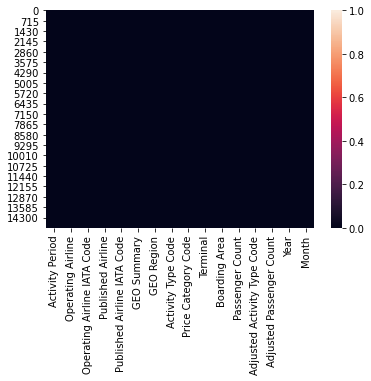

In [128]:
sns.heatmap(df.isnull())

In [129]:
sum(df.duplicated())

0

df.drop_duplicates(inplace=True)

In [130]:
imputer = SimpleImputer(missing_values = np.nan,
                        strategy ='mean')

In [131]:
df = [[12, np.nan, 34], [10, 32, np.nan],
        [np.nan, 11, 20]]

In [132]:
print("Original Data : \n", df)

Original Data : 
 [[12, nan, 34], [10, 32, nan], [nan, 11, 20]]


In [133]:
imputer = imputer.fit(df)

In [134]:
print("Imputed Data : \n", df)

Imputed Data : 
 [[12, nan, 34], [10, 32, nan], [nan, 11, 20]]


In [146]:
print(X.shape, y.shape)

(15007, 15) (150,)


In [147]:
model = RandomForestClassifier()

In [148]:
clf = svm.SVC(kernel='linear')

X_tr, X_tst, y_tr, y_tst = tts(df.data, df.target, test_size=25/100,random_state=109)

In [149]:
clf = svm.SVC(kernel='rbf')

In [150]:
iris = datasets.load_iris()

In [151]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [152]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [153]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [154]:
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [155]:
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y=data['species'] 

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
clf=RandomForestClassifier(n_estimators=100)

In [159]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [160]:
y_pred=clf.predict(X_test)

In [161]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9777777777777777


In [162]:
clf.predict([[3, 5, 4, 2]])

array([1])

In [163]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
clf=RandomForestClassifier(n_estimators=100)

In [165]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [166]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(n_jobs=1)

In [167]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.440213
petal length (cm)    0.420418
sepal length (cm)    0.101478
sepal width (cm)     0.037891
dtype: float64

<AxesSubplot:>

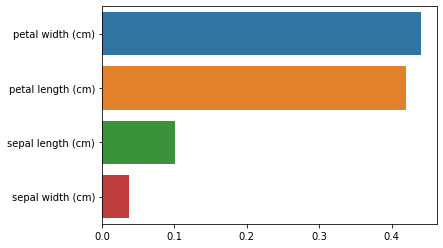

In [168]:
sns.barplot(x=feature_imp, y=feature_imp.index)

No handles with labels found to put in legend.


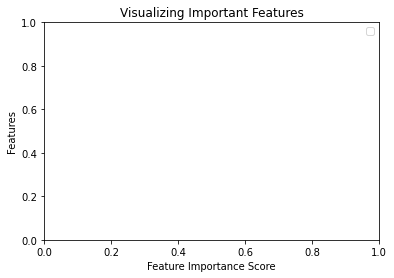

In [169]:
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [171]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [172]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [173]:
y_pred = classifier.predict(X_test)

In [174]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0  6  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.86      0.92         7
           2       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



In [175]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

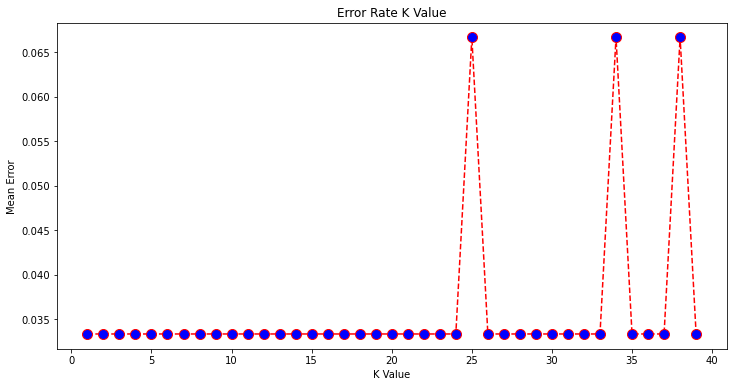

In [176]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')